# ADA 1

## Machine Learning: Exploratory Data Analysis (EDA)

### Librerias a emplear

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
import locale
import pickle
#locale.setlocale(locale.LC_TIME, "es_ES")
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import squarify

### Base de datos a emplear:

In [2]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('youtube_dataset.csv')

### Información relevante sobre la base de datos

In [4]:
df.head()

,index,totalviews/channelelapsedtime,channelId,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,videoId,dislikes/views,channelelapsedtime,comments/subscriber,likes/views,channelCommentCount,videoViewCount,likes/dislikes,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount
0,0,0.165199,UCdzU3DSGzyWzN2118yd9X9g,22,14654,0.555556,95.111111,30,18,--DwgB78t-c,0.000584,88705,0.000000,0.005841,1,1712,-2.0,0.000000,488.466667,50040,10,1,0.055556,814.111111,0.034213,2012-01-19T18:38:28.000Z,0
1,1,1.133820,UC0UnhAG47DRyVZGVcbhAXhQ,10,105909,0.239130,59.326087,51,184,--NZRkXBV7k,0.000275,93409,0.010870,0.004031,8,10916,-2.0,0.000183,2076.647059,22080,44,3,0.016304,575.592391,0.494384,2015-03-30T04:04:40.000Z,2
2,2,0.668120,UCXjtAvK5P3wXBGh0vbGylzg,27,48265,0.023669,10.289941,72,338,--hoQ2sGG4M,0.000288,72240,0.005917,0.002300,5,3478,-2.0,0.000575,670.347222,71544,8,1,0.002959,142.795858,0.048613,2009-08-07T06:51:10.000Z,2
3,3,25.653505,UCeKHMeUlcLNPLCLUfZUQI2w,26,2116722,0.007301,0.884178,172,22051,--sBoaqBlzA,0.000308,82512,0.000453,0.008258,74,19497,-2.0,0.000513,12306.523256,54096,161,6,0.000272,95.992109,0.360415,2011-08-04T01:07:38.000Z,10
4,4,52.773778,UCNWPDyaWf2eAHnofFLSnEMg,20,1649075,0.004545,10.004545,2777,220,--7h1S4neDM,0.000000,31248,0.000000,0.000454,0,2201,-2.0,0.000000,593.833273,30120,1,0,0.000000,7495.795455,0.073074,2014-04-29T15:44:44.000Z,0


Nombre de las columnas del dataset

In [5]:
list(df.columns)

['index',
 'totalviews/channelelapsedtime',
 'channelId',
 'videoCategoryId',
 'channelViewCount',
 'likes/subscriber',
 'views/subscribers',
 'videoCount',
 'subscriberCount',
 'videoId',
 'dislikes/views',
 'channelelapsedtime',
 'comments/subscriber',
 'likes/views',
 'channelCommentCount',
 'videoViewCount',
 'likes/dislikes',
 'comments/views',
 'totvideos/videocount',
 'elapsedtime',
 'videoLikeCount',
 'videoDislikeCount',
 'dislikes/subscriber',
 'totviews/totsubs',
 'views/elapsedtime',
 'videoPublished',
 'VideoCommentCount']

In [6]:
df.dtypes

index                              int64
totalviews/channelelapsedtime    float64
channelId                         object
videoCategoryId                    int64
channelViewCount                   int64
likes/subscriber                 float64
views/subscribers                float64
videoCount                         int64
subscriberCount                    int64
videoId                           object
dislikes/views                   float64
channelelapsedtime                 int64
comments/subscriber              float64
likes/views                      float64
channelCommentCount                int64
videoViewCount                     int64
likes/dislikes                   float64
comments/views                   float64
totvideos/videocount             float64
elapsedtime                        int64
videoLikeCount                     int64
videoDislikeCount                  int64
dislikes/subscriber              float64
totviews/totsubs                 float64
views/elapsedtim

A simple vista parece ser que no hay una variable categorica, pero revisando la base de datos podemos notarnos que videoCategoryId es una variable que asigna un numero dependiendo de la categoria que pertenezca el video de acuerdo a su ID

### Variables de Interés

- videoCategoryID: Porque clasifica que tipo de categoría pertenece cada video, dependiendo de su ID.
- channelViewCounts: Dado que nos especifica el recuento de vistas que ha tenido el canal que subio el respectivo video.
- subscriberCount: Para verificar que relación hay entre el número de suscriptores de un canal, con respecto a otras variables.
- video Count: Influencia que puede tener el historico de un canal con respecto a otras variables.
- subscriber Count: Recuento de suscriptores
- channelelapsedtime: Tiempo transcurrido del canal
- channelCommentCount: Recuento de comentarios en el canal 
- videoViewCount: Recuento de vistas de video
- elapsed time: Tiempo transcurrido
- video Like Count: Recuento de like del video
- video Dislike Count: Recuento de dislikes del video
- video Published: Dado que nos proporciona mucha información, como es el caso de a que hora se subio, que día de la semana se subio, que mes se subio.
- Video Comment Count: Numero de comentarios de video


### Realizamos un análisis descriptivo primario

In [7]:
df.describe()

,index,totalviews/channelelapsedtime,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,dislikes/views,channelelapsedtime,comments/subscriber,likes/views,channelCommentCount,videoViewCount,likes/dislikes,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,VideoCommentCount
count,575610.000000,575610.000000,575610.000000,5.756100e+05,575610.000000,575610.000000,575610.000000,5.756100e+05,575610.000000,575610.000000,575610.000000,575610.000000,5.756100e+05,5.756100e+05,575610.000000,575610.000000,5.756100e+05,575610.000000,5.756100e+05,575610.000000,575610.000000,5.756100e+05,575610.000000,575610.000000
mean,287804.500000,713.682808,17.560551,4.829119e+07,0.562041,308.993792,1204.464627,8.097598e+04,-0.019370,67941.305267,0.139804,-0.013684,7.312371e+02,5.883908e+04,-0.086000,-0.019404,4.092935e+04,50755.786958,2.921508e+02,18.921494,0.074623,1.698531e+03,1.517436,39.082997
std,166164.438561,6481.875213,7.904187,4.630822e+08,2.804067,1584.321770,8303.754974,6.033393e+05,0.139794,20629.159278,1.485730,0.141140,2.724153e+04,1.230696e+06,16.813385,0.143906,4.883613e+05,19725.560307,4.507472e+03,434.947624,1.264975,4.220210e+03,31.451958,557.811895
min,0.000000,0.000000,1.000000,0.000000e+00,-1.000000,-1.000000,0.000000,0.000000e+00,-1.000000,888.000000,-1.000000,-1.000000,0.000000e+00,-1.000000e+00,-2.000000,-1.000000,-1.000000e+00,17520.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000e+00,-0.000051,-1.000000
25%,143902.250000,0.773417,10.000000,5.045000e+04,0.002832,0.919155,17.000000,3.800000e+01,0.000000,51984.000000,0.000000,0.001304,0.000000e+00,2.204000e+03,-2.000000,0.000062,1.805763e+03,34656.000000,5.000000e+00,0.000000,0.000000,3.477048e+02,0.045762,1.000000
50%,287804.500000,6.213229,20.000000,4.086660e+05,0.029412,11.767535,70.000000,4.080000e+02,0.000176,68400.000000,0.002498,0.002932,2.000000e+00,4.807000e+03,-2.000000,0.000541,5.355000e+03,48480.000000,1.600000e+01,1.000000,0.000268,8.462006e+02,0.106729,4.000000
75%,431706.750000,56.610846,24.000000,3.616452e+06,0.273810,120.648028,336.000000,5.319000e+03,0.000554,85824.000000,0.045455,0.006357,2.300000e+01,1.526600e+04,-2.000000,0.001579,1.784933e+04,65424.000000,6.000000e+01,5.000000,0.013707,1.829000e+03,0.347067,14.000000
max,575609.000000,683532.725598,44.000000,2.379817e+10,505.000000,279803.000000,415500.000000,2.525311e+07,0.322981,108913.000000,485.000000,1.418500,3.953563e+06,5.008939e+08,1835.000000,1.003530,1.503287e+08,106609.000000,1.240473e+06,244280.000000,343.500000,1.672107e+06,11698.756213,191498.000000


Notamos que hay algunas variables que tienen valores negativos como lo es el caso de las columnas:

- likes/subscriber
- views/subscribers
- dislikes/views
- comments/subscriber
- likes/views
- videoViewCount
- likes/dislikes
- comments/views
- totvideos/videocount
- videoLikeCount
- videoDislikeCount
- dislikes/subscriber
- totviews/totsubs
- views/elapsedtime
- VideoCommentCount

Y esto a primera vista, no tiene sentido dado que tenemos conocimiento de que las variables no se encuentra estandarizada y esto se puede deber a que como las columnas anteriores son ratios lo que podría suceder es que el denominador es 0 y los capturistas pudieron calcularlo con un valor negativo. Por lo que procedemos a quitarlas de nuestro dataset.

### Verificamos que no existan datos faltantes

In [8]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575610 entries, 0 to 575609
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index                          575610 non-null  int64  
 1   totalviews/channelelapsedtime  575610 non-null  float64
 2   channelId                      575610 non-null  object 
 3   videoCategoryId                575610 non-null  int64  
 4   channelViewCount               575610 non-null  int64  
 5   likes/subscriber               575610 non-null  float64
 6   views/subscribers              575610 non-null  float64
 7   videoCount                     575610 non-null  int64  
 8   subscriberCount                575610 non-null  int64  
 9   videoId                        575610 non-null  object 
 10  dislikes/views                 575610 non-null  float64
 11  channelelapsedtime             575610 non-null  int64  
 12  comments/subscriber           

/tmp/ipykernel_60374/2728897127.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True,null_counts=True)


Observamos que no hay datos faltantes

### Creamos columnas de la Fecha y hora de la publicación de los videos

In [ ]:
df['Año'] = df.apply(lambda x: int(x.videoPublished[0:4]),axis=1)
df['Mes'] = df.apply(lambda x: int(x.videoPublished[5:7]),axis=1)
df['Dia'] = df.apply(lambda x: int(x.videoPublished[8:10]),axis=1)
df['Hora']= df.apply(lambda x: int(x.videoPublished[11:13]),axis=1)
df.head()

### Nuevas variables a partir de la columna *videoPublished*

Una vez que hemos obtenido la fecha y la hora de la respectiva publicación de los videos, procedemos a realizar una manipulación de nuestros datos tiempo, para obtener el día de la semana que se publico el video, así como crear una variable categorica a partir de las horas

In [10]:
trans = lambda x: datetime(int(x.Año),int(x.Mes),int(x.Dia))
df['Dia_Semana'] = df.apply(lambda x: trans(x).strftime("%A"), axis=1)
df['Nombre_Mes'] = df.apply(lambda x: trans(x).strftime("%B"), axis=1)
df.head()

,index,totalviews/channelelapsedtime,channelId,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,videoId,dislikes/views,channelelapsedtime,comments/subscriber,likes/views,channelCommentCount,videoViewCount,likes/dislikes,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount,Año,Mes,Dia,Hora,Dia_Semana,Nombre_Mes
0,0,0.165199,UCdzU3DSGzyWzN2118yd9X9g,22,14654,0.555556,95.111111,30,18,--DwgB78t-c,0.000584,88705,0.000000,0.005841,1,1712,-2.0,0.000000,488.466667,50040,10,1,0.055556,814.111111,0.034213,2012-01-19T18:38:28.000Z,0,2012,1,19,18,Thursday,January
1,1,1.133820,UC0UnhAG47DRyVZGVcbhAXhQ,10,105909,0.239130,59.326087,51,184,--NZRkXBV7k,0.000275,93409,0.010870,0.004031,8,10916,-2.0,0.000183,2076.647059,22080,44,3,0.016304,575.592391,0.494384,2015-03-30T04:04:40.000Z,2,2015,3,30,4,Monday,March
2,2,0.668120,UCXjtAvK5P3wXBGh0vbGylzg,27,48265,0.023669,10.289941,72,338,--hoQ2sGG4M,0.000288,72240,0.005917,0.002300,5,3478,-2.0,0.000575,670.347222,71544,8,1,0.002959,142.795858,0.048613,2009-08-07T06:51:10.000Z,2,2009,8,7,6,Friday,August
3,3,25.653505,UCeKHMeUlcLNPLCLUfZUQI2w,26,2116722,0.007301,0.884178,172,22051,--sBoaqBlzA,0.000308,82512,0.000453,0.008258,74,19497,-2.0,0.000513,12306.523256,54096,161,6,0.000272,95.992109,0.360415,2011-08-04T01:07:38.000Z,10,2011,8,4,1,Thursday,August
4,4,52.773778,UCNWPDyaWf2eAHnofFLSnEMg,20,1649075,0.004545,10.004545,2777,220,--7h1S4neDM,0.000000,31248,0.000000,0.000454,0,2201,-2.0,0.000000,593.833273,30120,1,0,0.000000,7495.795455,0.073074,2014-04-29T15:44:44.000Z,0,2014,4,29,15,Tuesday,April


Eliminamos las columnas que no vamos a emplear

In [11]:
df.drop(['channelId','videoId'],axis = 1,inplace=True)
df.head()

,index,totalviews/channelelapsedtime,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,dislikes/views,channelelapsedtime,comments/subscriber,likes/views,channelCommentCount,videoViewCount,likes/dislikes,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount,Año,Mes,Dia,Hora,Dia_Semana,Nombre_Mes
0,0,0.165199,22,14654,0.555556,95.111111,30,18,0.000584,88705,0.000000,0.005841,1,1712,-2.0,0.000000,488.466667,50040,10,1,0.055556,814.111111,0.034213,2012-01-19T18:38:28.000Z,0,2012,1,19,18,Thursday,January
1,1,1.133820,10,105909,0.239130,59.326087,51,184,0.000275,93409,0.010870,0.004031,8,10916,-2.0,0.000183,2076.647059,22080,44,3,0.016304,575.592391,0.494384,2015-03-30T04:04:40.000Z,2,2015,3,30,4,Monday,March
2,2,0.668120,27,48265,0.023669,10.289941,72,338,0.000288,72240,0.005917,0.002300,5,3478,-2.0,0.000575,670.347222,71544,8,1,0.002959,142.795858,0.048613,2009-08-07T06:51:10.000Z,2,2009,8,7,6,Friday,August
3,3,25.653505,26,2116722,0.007301,0.884178,172,22051,0.000308,82512,0.000453,0.008258,74,19497,-2.0,0.000513,12306.523256,54096,161,6,0.000272,95.992109,0.360415,2011-08-04T01:07:38.000Z,10,2011,8,4,1,Thursday,August
4,4,52.773778,20,1649075,0.004545,10.004545,2777,220,0.000000,31248,0.000000,0.000454,0,2201,-2.0,0.000000,593.833273,30120,1,0,0.000000,7495.795455,0.073074,2014-04-29T15:44:44.000Z,0,2014,4,29,15,Tuesday,April


### Creamos un nuevo dataset 

Este dataset incluya las variables que no tienen numero negativos en su valores, así como que no se empleen como denominador en las operaciones de los ratios y los creados a partir de la variable fecha.

- Notemos que todos ellos son de clase int64 y object

In [12]:
main_cols = ['index','videoCategoryId','channelViewCount','channelCommentCount','videoLikeCount','Año','Mes','Dia','Hora','Dia_Semana','Nombre_Mes']
df_one = df[main_cols]
df_one.head()

,index,videoCategoryId,channelViewCount,channelCommentCount,videoLikeCount,Año,Mes,Dia,Hora,Dia_Semana,Nombre_Mes
0,0,22,14654,1,10,2012,1,19,18,Thursday,January
1,1,10,105909,8,44,2015,3,30,4,Monday,March
2,2,27,48265,5,8,2009,8,7,6,Friday,August
3,3,26,2116722,74,161,2011,8,4,1,Thursday,August
4,4,20,1649075,0,1,2014,4,29,15,Tuesday,April


### Creamos un segundo dataset

En este se encuentre aquellos valores de tipo int64 que se utilicen como denominador para las operaciones

In [13]:
den_cols = ['index','videoCount','subscriberCount','channelelapsedtime','videoViewCount','elapsedtime','videoDislikeCount','VideoCommentCount']
df_two = df[den_cols]
df_two.head()

,index,videoCount,subscriberCount,channelelapsedtime,videoViewCount,elapsedtime,videoDislikeCount,VideoCommentCount
0,0,30,18,88705,1712,50040,1,0
1,1,51,184,93409,10916,22080,3,2
2,2,72,338,72240,3478,71544,1,2
3,3,172,22051,82512,19497,54096,6,10
4,4,2777,220,31248,2201,30120,0,0


Eliminamos los valores menor o igual a 0. Debido a que no hacen sentido los que son menores a 0 y los que son igual a 0 ocasionaran errores o valores nulo al momento de hacer operaciones

In [14]:
df_two = df_two[df_two>0].dropna()
df_two.head()

,index,videoCount,subscriberCount,channelelapsedtime,videoViewCount,elapsedtime,videoDislikeCount,VideoCommentCount
1,1.0,51.0,184.0,93409,10916.0,22080,3.0,2.0
2,2.0,72.0,338.0,72240,3478.0,71544,1.0,2.0
3,3.0,172.0,22051.0,82512,19497.0,54096,6.0,10.0
6,6.0,22.0,109.0,82824,8423.0,66384,2.0,7.0
8,8.0,813.0,40482.0,59736,6545.0,46752,4.0,36.0


### Juntamos los dos dataframe, donde el dataframe predominante sera el df_two

In [15]:
df_three = pd.merge(left=df_two,right=df_one, how='left', left_on='index', right_on='index')
df_three.head()

,index,videoCount,subscriberCount,channelelapsedtime,videoViewCount,elapsedtime,videoDislikeCount,VideoCommentCount,videoCategoryId,channelViewCount,channelCommentCount,videoLikeCount,Año,Mes,Dia,Hora,Dia_Semana,Nombre_Mes
0,1.0,51.0,184.0,93409,10916.0,22080,3.0,2.0,10,105909,8,44,2015,3,30,4,Monday,March
1,2.0,72.0,338.0,72240,3478.0,71544,1.0,2.0,27,48265,5,8,2009,8,7,6,Friday,August
2,3.0,172.0,22051.0,82512,19497.0,54096,6.0,10.0,26,2116722,74,161,2011,8,4,1,Thursday,August
3,6.0,22.0,109.0,82824,8423.0,66384,2.0,7.0,27,209621,1,10,2010,3,9,20,Tuesday,March
4,8.0,813.0,40482.0,59736,6545.0,46752,4.0,36.0,20,4009812,90,83,2012,6,5,12,Tuesday,June


### Añadimos las columnas con las operaciones correspondientes

In [6]:
df_three['totalviews/channelelapsedtime'] = df_three.apply(
    lambda row: (row.channelViewCount)/(row.channelelapsedtime), axis=1)
df_three['likes/subscriber'] = df_three.apply(
    lambda row: (row.videoLikeCount)/(row.subscriberCount), axis=1)
df_three['views/subscribers'] = df_three.apply(
    lambda row: (row.videoViewCount)/(row.subscriberCount), axis=1)
df_three['dislikes/views'] = df_three.apply(
    lambda row: (row.videoDislikeCount)/(row.videoViewCount), axis=1)
df_three['comments/subscriber'] = df_three.apply(
    lambda row: (row.VideoCommentCount)/(row.subscriberCount), axis=1)
df_three['likes/views'] = df_three.apply(
    lambda row: (row.videoLikeCount)/(row.videoViewCount), axis=1)
df_three['likes/dislikes'] = df_three.apply(
    lambda row: (row.videoLikeCount)/(row.videoDislikeCount), axis=1)
df_three['comments/views'] = df_three.apply(
    lambda row: (row.VideoCommentCount)/(row.videoViewCount), axis=1)
df_three['totvideos/videocount'] = df_three.apply(
    lambda row: (row.channelViewCount)/(row.videoCount), axis=1)
df_three['dislikes/subscriber'] = df_three.apply(
    lambda row: (row.videoDislikeCount)/(row.subscriberCount), axis=1)
df_three['totviews/totsubs'] = df_three.apply(
    lambda row: (row.channelViewCount)/(row.subscriberCount), axis=1)
df_three['views/elapsedtime'] = df_three.apply(
    lambda row: (row.videoViewCount)/(row.elapsedtime), axis=1)
df_three.head()

NameError: name 'df_three' is not defined

### Dataset final

In [17]:
df_three.head()

,index,videoCount,subscriberCount,channelelapsedtime,videoViewCount,elapsedtime,videoDislikeCount,VideoCommentCount,videoCategoryId,channelViewCount,channelCommentCount,videoLikeCount,Año,Mes,Dia,Hora,Dia_Semana,Nombre_Mes,totalviews/channelelapsedtime,likes/subscriber,views/subscribers,dislikes/views,comments/subscriber,likes/views,likes/dislikes,comments/views,totvideos/videocount,dislikes/subscriber,totviews/totsubs,views/elapsedtime
0,1.0,51.0,184.0,93409,10916.0,22080,3.0,2.0,10,105909,8,44,2015,3,30,4,Monday,March,1.133820,0.239130,59.326087,0.000275,0.010870,0.004031,14.666667,0.000183,2076.647059,0.016304,575.592391,0.494384
1,2.0,72.0,338.0,72240,3478.0,71544,1.0,2.0,27,48265,5,8,2009,8,7,6,Friday,August,0.668120,0.023669,10.289941,0.000288,0.005917,0.002300,8.000000,0.000575,670.347222,0.002959,142.795858,0.048613
2,3.0,172.0,22051.0,82512,19497.0,54096,6.0,10.0,26,2116722,74,161,2011,8,4,1,Thursday,August,25.653505,0.007301,0.884178,0.000308,0.000453,0.008258,26.833333,0.000513,12306.523256,0.000272,95.992109,0.360415
3,6.0,22.0,109.0,82824,8423.0,66384,2.0,7.0,27,209621,1,10,2010,3,9,20,Tuesday,March,2.530921,0.091743,77.275229,0.000237,0.064220,0.001187,5.000000,0.000831,9528.227273,0.018349,1923.128440,0.126883
4,8.0,813.0,40482.0,59736,6545.0,46752,4.0,36.0,20,4009812,90,83,2012,6,5,12,Tuesday,June,67.125552,0.002050,0.161677,0.000611,0.000889,0.012681,20.750000,0.005500,4932.118081,0.000099,99.051727,0.139994


Realizamos un rapido análisis descriptivo

In [18]:
df_three.describe()

,index,videoCount,subscriberCount,channelelapsedtime,videoViewCount,elapsedtime,videoDislikeCount,VideoCommentCount,videoCategoryId,channelViewCount,channelCommentCount,videoLikeCount,Año,Mes,Dia,Hora,totalviews/channelelapsedtime,likes/subscriber,views/subscribers,dislikes/views,comments/subscriber,likes/views,likes/dislikes,comments/views,totvideos/videocount,dislikes/subscriber,totviews/totsubs,views/elapsedtime
count,314240.000000,314240.000000,3.142400e+05,314240.00000,3.142400e+05,314240.000000,314240.000000,314240.000000,314240.000000,3.142400e+05,3.142400e+05,3.142400e+05,314240.000000,314240.000000,314240.000000,314240.000000,314240.000000,314240.000000,314240.000000,314240.000000,3.142400e+05,314240.000000,314240.000000,3.142400e+05,3.142400e+05,3.142400e+05,314240.000000,314240.000000
mean,287889.656696,1113.862758,1.232451e+05,66563.22648,9.925086e+04,48770.826321,33.124901,68.010772,17.866316,6.623277e+07,1.242267e+03,5.136365e+02,2011.705489,6.411765,15.733433,12.758058,991.873507,0.777602,380.242008,0.000848,2.819287e-01,0.008256,22.348328,2.293841e-03,6.314067e+04,1.973309e-01,1547.213752,2.561127
std,166321.024739,7228.812979,7.317844e+05,21173.57334,1.649266e+06,19961.607988,585.230067,731.139513,7.909078,5.168284e+08,3.673094e+04,6.061365e+03,2.301793,3.417811,8.809664,6.962917,7594.084371,3.207918,1878.694653,0.002041,1.885764e+00,0.015212,38.044214,6.255269e-03,6.445031e+05,1.617169e+00,3362.650402,41.528687
min,1.000000,1.000000,1.000000e+00,2376.00000,1.002000e+03,17640.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,2005.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000173,0.000001,4.155335e-08,0.000000,0.000000,3.086343e-07,0.000000e+00,4.810545e-08,0.000000,0.010160
25%,143764.500000,18.000000,8.400000e+01,49992.00000,3.743000e+03,32400.000000,2.000000,3.000000,10.000000,8.344025e+04,0.000000e+00,1.400000e+01,2010.000000,3.000000,8.000000,7.000000,1.312851,0.005253,0.899351,0.000176,1.011782e-03,0.001792,4.142857,3.528337e-04,2.796889e+03,3.663675e-04,293.868833,0.082663
50%,287765.000000,78.000000,9.490000e+02,66312.00000,1.018300e+04,45600.000000,4.000000,10.000000,20.000000,6.903750e+05,5.000000e+00,4.200000e+01,2012.000000,6.000000,16.000000,14.000000,10.810190,0.043836,12.471769,0.000381,1.055409e-02,0.003821,10.692308,8.753392e-04,8.846402e+03,4.464286e-03,708.510793,0.230261
75%,432160.250000,375.000000,1.401325e+04,85032.00000,3.305100e+04,62928.000000,11.000000,31.000000,24.000000,6.439977e+06,4.500000e+01,1.460000e+02,2014.000000,9.000000,23.000000,19.000000,103.936742,0.400000,144.518029,0.000838,1.038961e-01,0.008394,25.500000,2.252252e-03,2.912956e+04,5.424401e-02,1597.697794,0.768556
max,575609.000000,331770.000000,2.525311e+07,108913.00000,5.008939e+08,106609.000000,244280.000000,191498.000000,44.000000,2.379817e+10,3.953563e+06,1.240473e+06,2015.000000,12.000000,31.000000,23.000000,683532.725598,367.666667,184169.000000,0.322981,4.850000e+02,1.418500,1735.000000,1.003530e+00,1.503287e+08,3.435000e+02,476935.000000,11698.756213


In [19]:
df_three.dtypes

index                            float64
videoCount                       float64
subscriberCount                  float64
channelelapsedtime                 int64
videoViewCount                   float64
elapsedtime                        int64
videoDislikeCount                float64
VideoCommentCount                float64
videoCategoryId                    int64
channelViewCount                   int64
channelCommentCount                int64
videoLikeCount                     int64
Año                                int64
Mes                                int64
Dia                                int64
Hora                               int64
Dia_Semana                        object
Nombre_Mes                        object
totalviews/channelelapsedtime    float64
likes/subscriber                 float64
views/subscribers                float64
dislikes/views                   float64
comments/subscriber              float64
likes/views                      float64
likes/dislikes  

### Creamos nuestras variables categoricas

In [20]:
df_three['Etiqueta_Hora']=pd.cut(pd.to_numeric(df_three['Hora']),
                          bins=[0,6,12,18,24],
                          labels = ['Madrugada','Mañana','Tarde','Noche'],
                          include_lowest=True)

In [21]:
df_three['Ratio_likes/views']=pd.cut(df_three['likes/views'],
                          bins=[0,0.25,0.5,0.75,float('inf')],
                          labels = ['Bajo','Medio Bajo','Medio Alto','Alto'],
                          include_lowest=True)

### Análisis de Matriz de Correlación

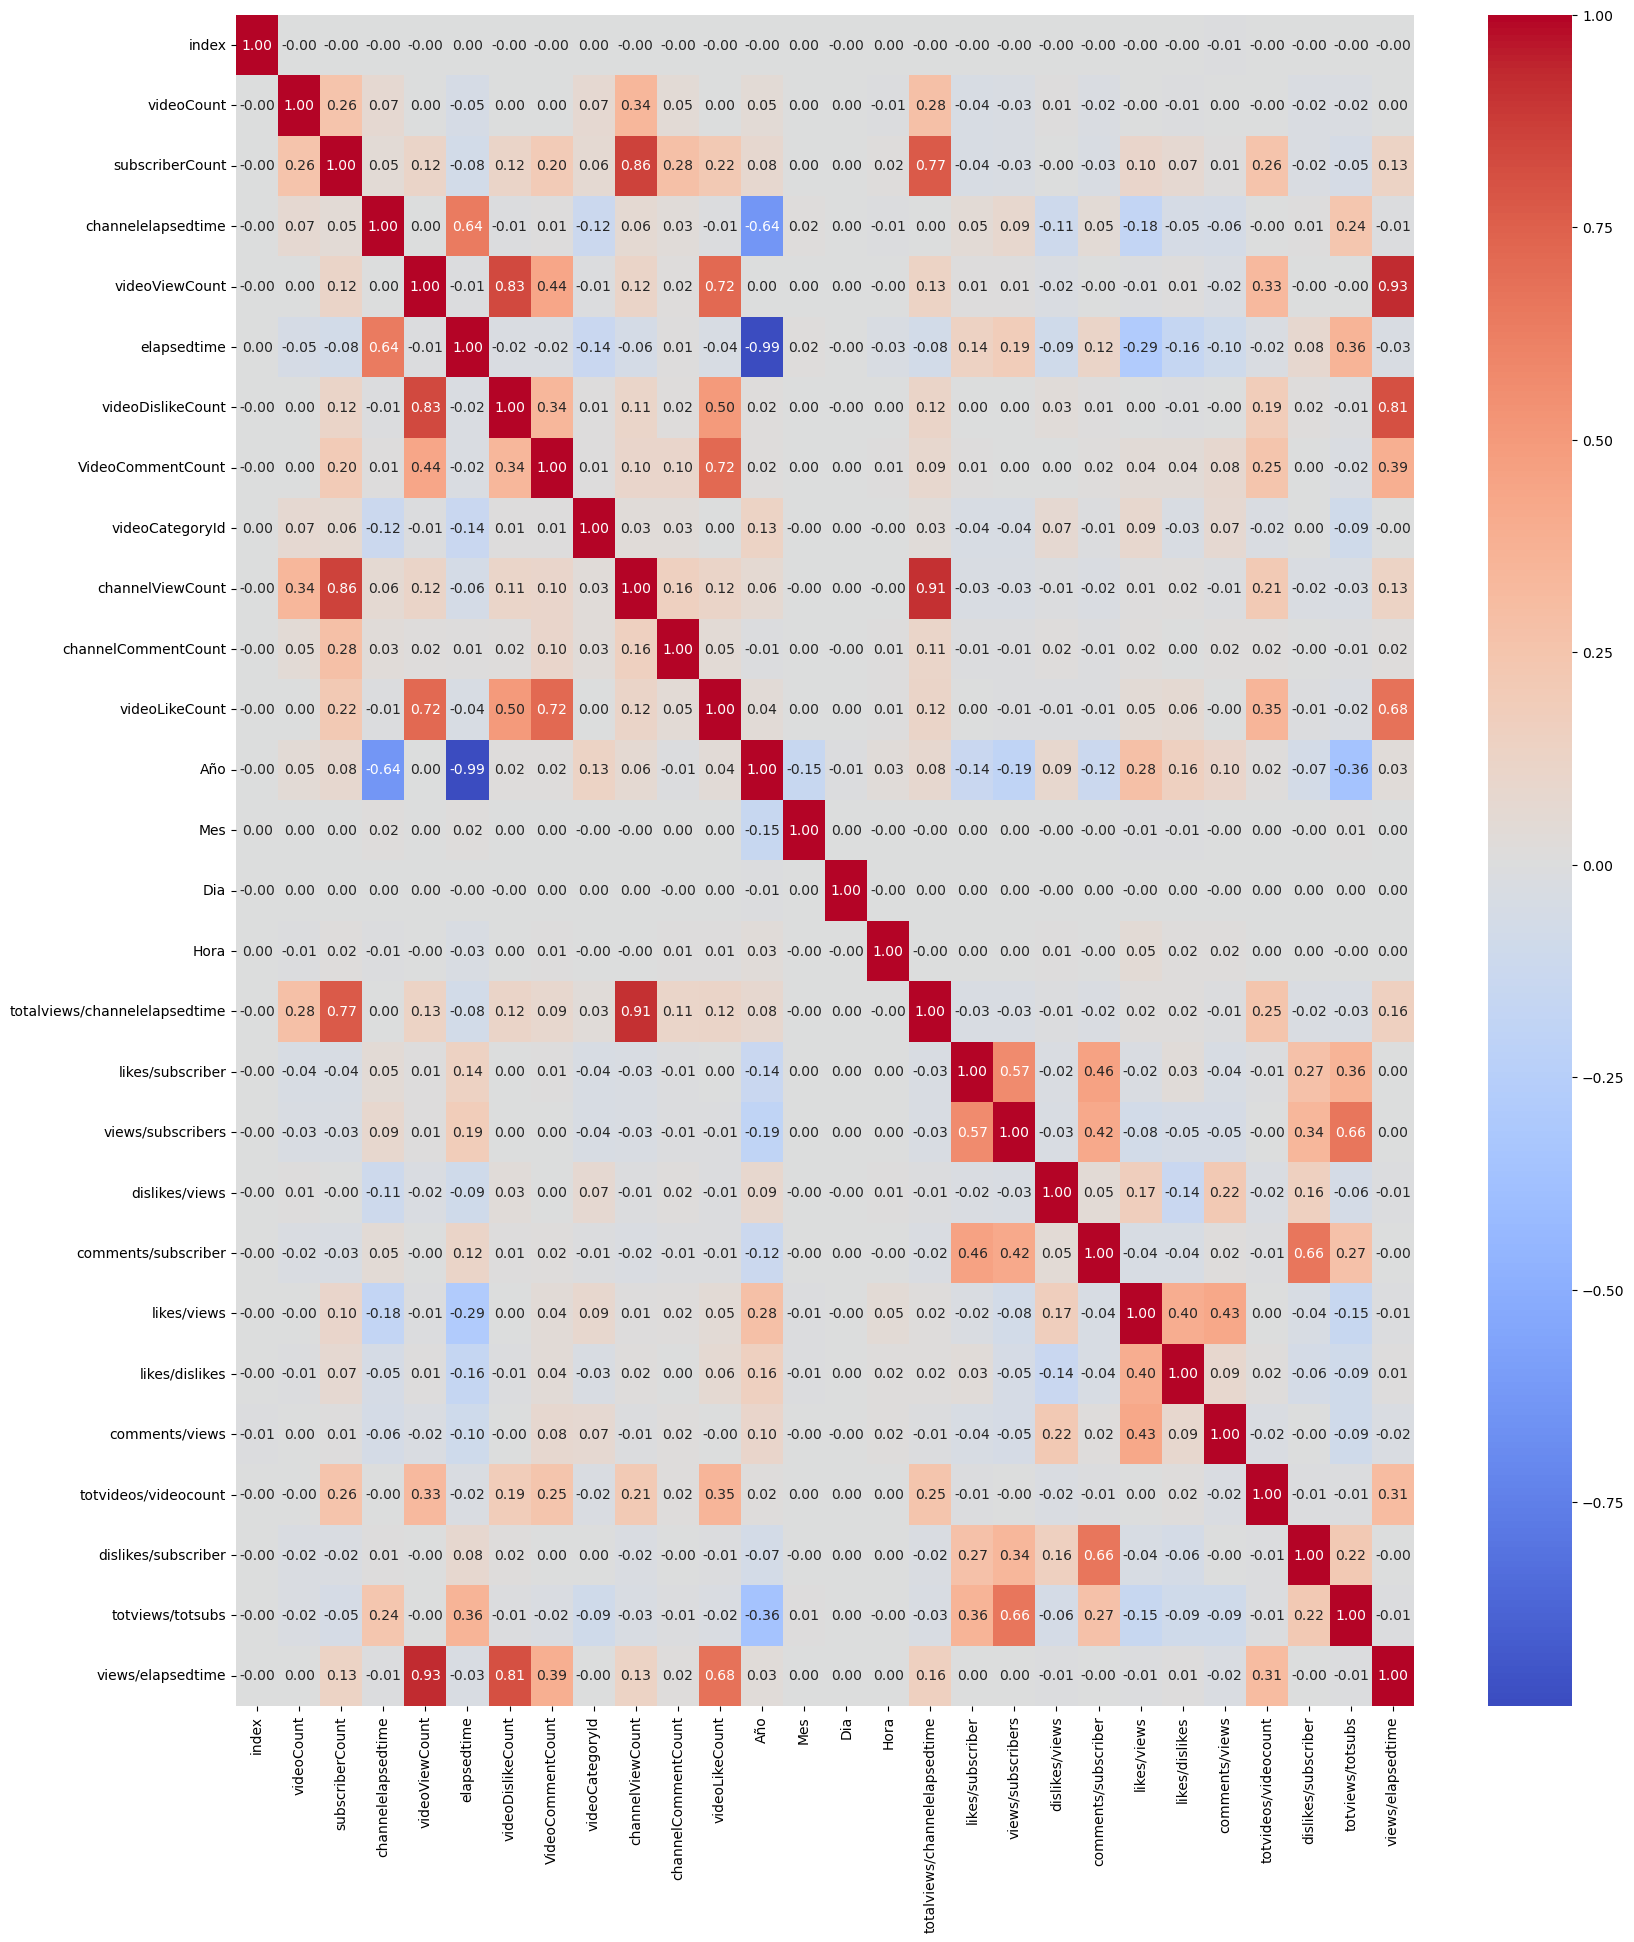

In [22]:
f, ax = plt.subplots(figsize=(19, 19))
#utilizando la funcion corr() de pandas
corr = df_three.corr()
#heatmap se utiliza para graficar la matriz de correlaciones
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=0.0005)
f.subplots_adjust(top=1)
#t= f.suptitle('Correlation Heatmap', fontsize=9)

### Histograma

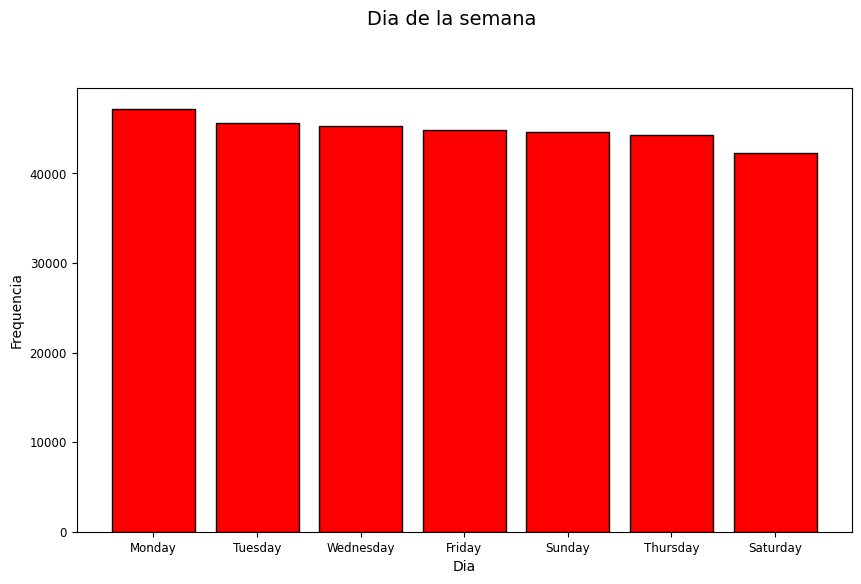

In [23]:
# Frecuencia de videos
fig = plt.figure(figsize = (10, 6))
title = fig.suptitle("Dia de la semana", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Dia")
ax.set_ylabel("Frequencia")
w_q = df_three['Dia_Semana'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='red',
        edgecolor='black', linewidth=1)

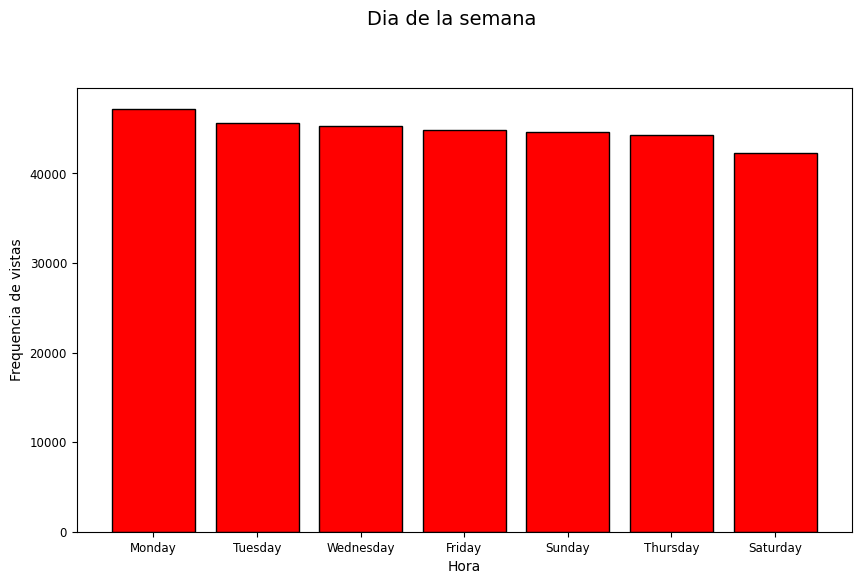

In [24]:
# Frecuencia de vistas
fig = plt.figure(figsize = (10, 6))
title = fig.suptitle("Dia de la semana", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Hora")
ax.set_ylabel("Frequencia de vistas")
w_q = df_three['Dia_Semana'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='red',
        edgecolor='black', linewidth=1)

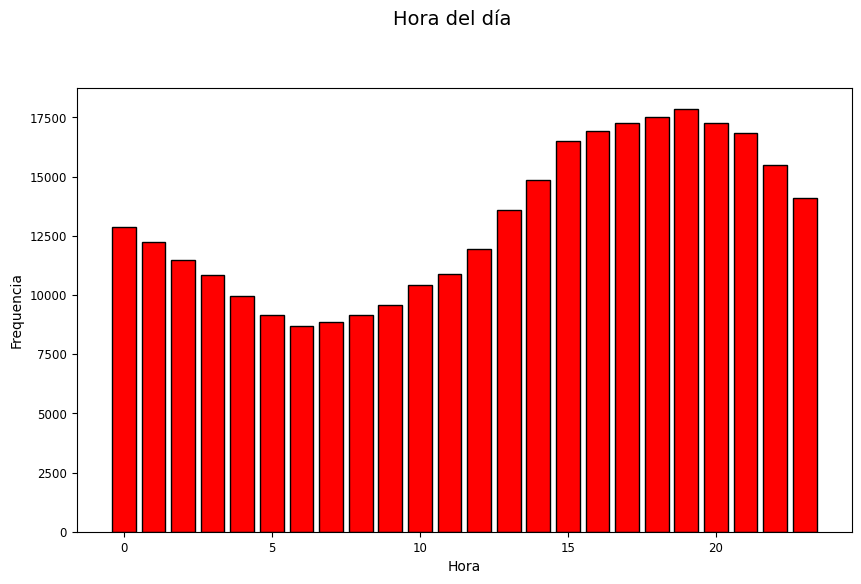

In [25]:
fig = plt.figure(figsize = (10, 6))
title = fig.suptitle("Hora del día", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Hora")
ax.set_ylabel("Frequencia") 
w_q = df_three['Hora'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='red', 
        edgecolor='black', linewidth=1)

### Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe26d797c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe26d7501c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe26d797940>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe26d750700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe26d7509a0>],
 'means': []}

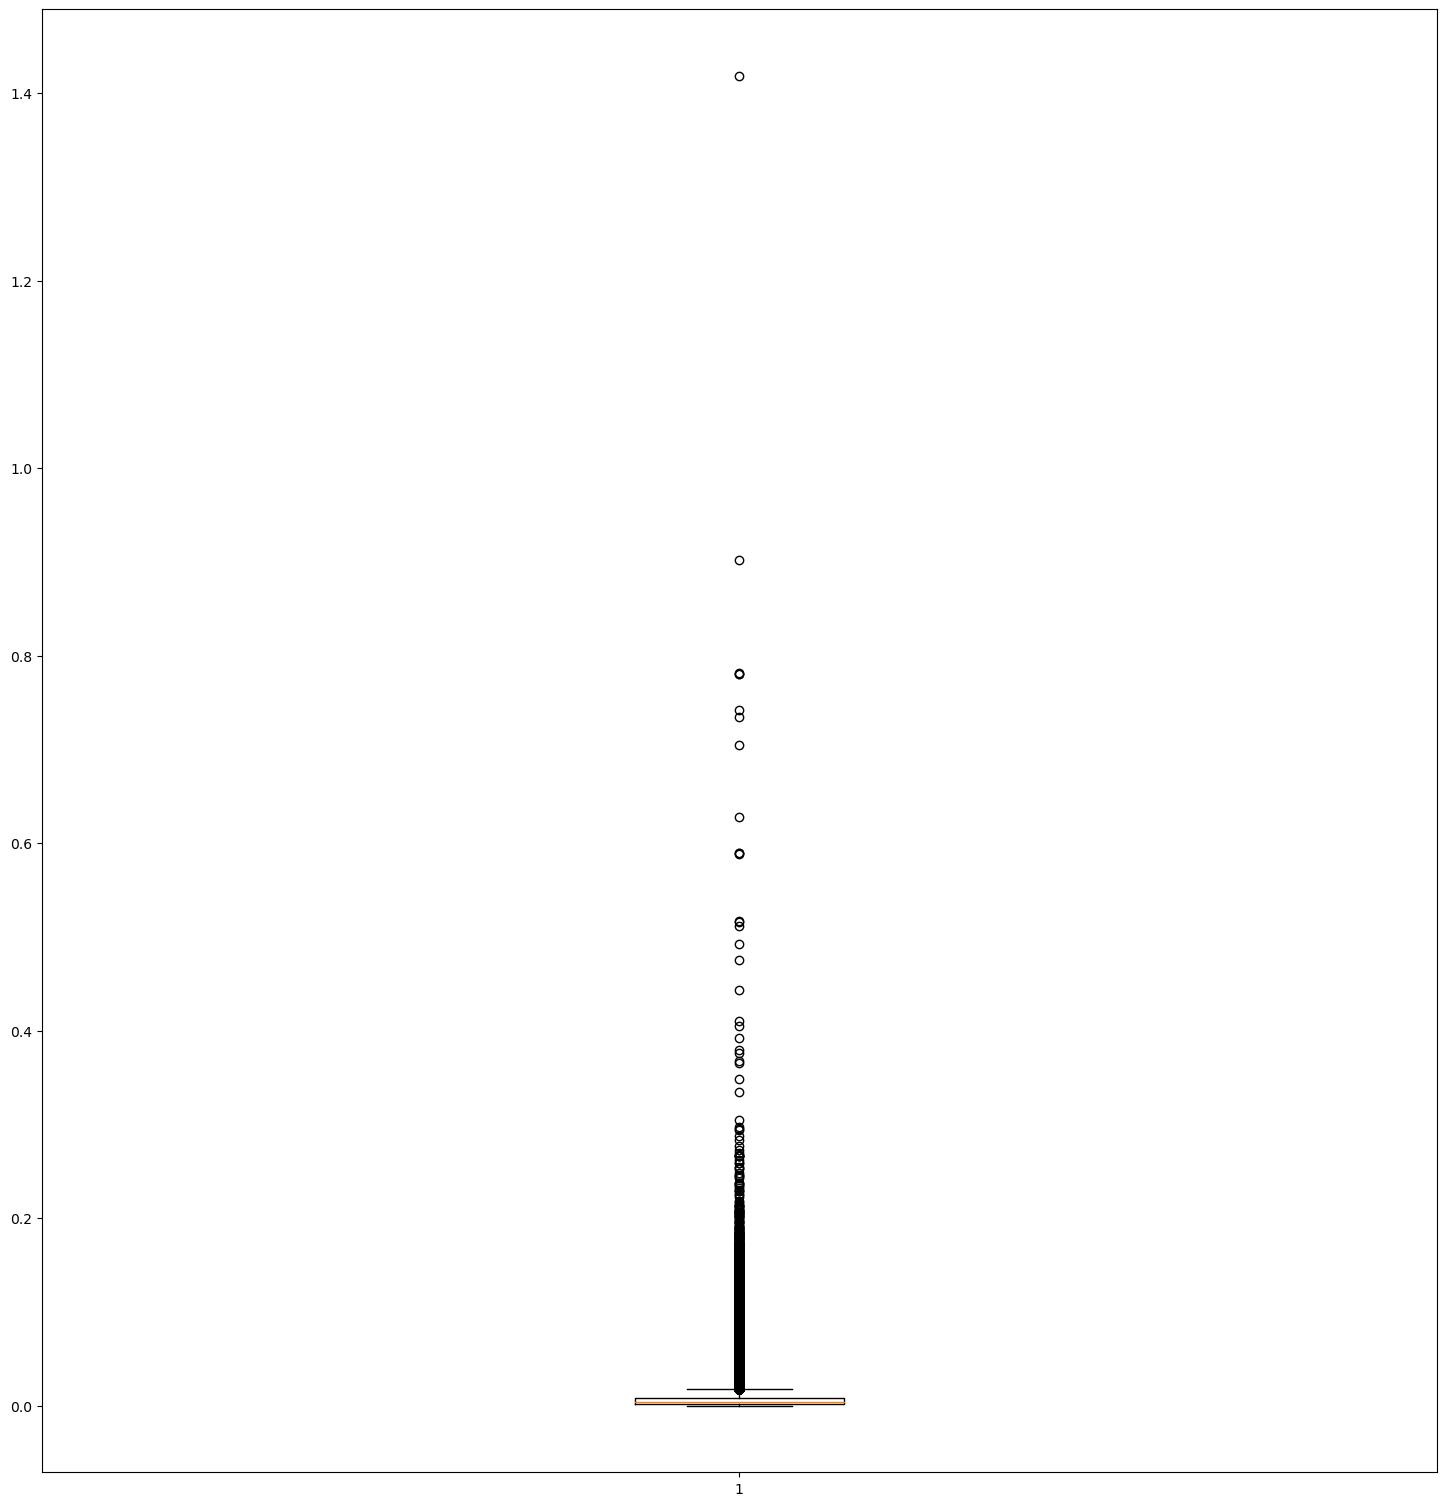

In [26]:
fig = plt.figure(figsize =(18, 19))
plt.boxplot(df_three['likes/views'])

### Estandarizamos los datos

In [27]:
df_lista = df_three.select_dtypes(include = ["int64","float64"])
drops =['index','videoCount','videoCategoryId','channelCommentCount','Año','Mes','Dia','totalviews/channelelapsedtime','dislikes/views','dislikes/subscriber','comments/subscriber','comments/views']
df_lista.drop(drops, axis=1, inplace=True)

In [28]:
lista = list(df_lista.columns)
lista

['subscriberCount',
 'channelelapsedtime',
 'videoViewCount',
 'elapsedtime',
 'videoDislikeCount',
 'VideoCommentCount',
 'channelViewCount',
 'videoLikeCount',
 'Hora',
 'likes/subscriber',
 'views/subscribers',
 'likes/views',
 'likes/dislikes',
 'totvideos/videocount',
 'totviews/totsubs',
 'views/elapsedtime']

In [29]:
subset_df = df_three[lista]
ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=lista[0:26])
final_df = pd.concat([scaled_df, df_three['Dia_Semana']], axis=1)
final_df.head()

,subscriberCount,channelelapsedtime,videoViewCount,elapsedtime,videoDislikeCount,VideoCommentCount,channelViewCount,videoLikeCount,Hora,likes/subscriber,views/subscribers,likes/views,likes/dislikes,totvideos/videocount,totviews/totsubs,views/elapsedtime,Dia_Semana
0,-0.168166,1.267893,-0.053560,-1.337110,-0.051475,-0.090285,-0.127948,-0.077480,-1.257816,-0.167857,-0.170819,-0.277761,-0.201914,-0.094746,-0.288946,-0.049767,Monday
1,-0.167956,0.268107,-0.058070,1.140850,-0.054893,-0.090285,-0.128059,-0.083420,-0.970580,-0.235023,-0.196920,-0.391524,-0.377149,-0.096928,-0.417653,-0.060501,Friday
2,-0.138284,0.753241,-0.048357,0.266771,-0.046349,-0.079343,-0.124057,-0.058178,-1.688671,-0.240125,-0.201927,0.000098,0.117889,-0.078874,-0.431571,-0.052993,Thursday
3,-0.168269,0.767976,-0.055072,0.882354,-0.053184,-0.083446,-0.127747,-0.083090,1.040075,-0.213802,-0.161265,-0.464684,-0.456005,-0.083184,0.111791,-0.058616,Tuesday
4,-0.113098,-0.322441,-0.056210,-0.101136,-0.049767,-0.043782,-0.120394,-0.071046,-0.108871,-0.241762,-0.202311,0.290897,-0.042012,-0.090316,-0.430662,-0.058300,Tuesday


### Guardamos los datos

In [47]:
final_df.to_pickle("df.pickle")
df_three.to_pickle("df_three.pickle")

### Cargamos los datos

In [34]:
final_df = pd.read_pickle("df.pickle")
final_df.head()

,subscriberCount,channelelapsedtime,videoViewCount,elapsedtime,videoDislikeCount,VideoCommentCount,channelViewCount,videoLikeCount,Hora,likes/subscriber,views/subscribers,likes/views,likes/dislikes,totvideos/videocount,totviews/totsubs,views/elapsedtime,Dia_Semana
0,-0.168166,1.267893,-0.053560,-1.337110,-0.051475,-0.090285,-0.127948,-0.077480,-1.257816,-0.167857,-0.170819,-0.277761,-0.201914,-0.094746,-0.288946,-0.049767,Monday
1,-0.167956,0.268107,-0.058070,1.140850,-0.054893,-0.090285,-0.128059,-0.083420,-0.970580,-0.235023,-0.196920,-0.391524,-0.377149,-0.096928,-0.417653,-0.060501,Friday
2,-0.138284,0.753241,-0.048357,0.266771,-0.046349,-0.079343,-0.124057,-0.058178,-1.688671,-0.240125,-0.201927,0.000098,0.117889,-0.078874,-0.431571,-0.052993,Thursday
3,-0.168269,0.767976,-0.055072,0.882354,-0.053184,-0.083446,-0.127747,-0.083090,1.040075,-0.213802,-0.161265,-0.464684,-0.456005,-0.083184,0.111791,-0.058616,Tuesday
4,-0.113098,-0.322441,-0.056210,-0.101136,-0.049767,-0.043782,-0.120394,-0.071046,-0.108871,-0.241762,-0.202311,0.290897,-0.042012,-0.090316,-0.430662,-0.058300,Tuesday


### Gráficas de variables